#  Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [9]:
import pandas as pd

# Reading the CSV file
file_path = 'Metro_Interstate_Traffic_Volume.csv'
traffic_data = pd.read_csv(file_path)

# Displaying the first and last five rows of the dataset
first_five_rows = traffic_data.head()
last_five_rows = traffic_data.tail()

# Using DataFrame.info() to find more information about the dataset
dataframe_info = traffic_data.info()

first_five_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [10]:
last_five_rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


## Analyzing Traffic Volume

First we will plot a histogram to examine the distribution of the traffic_volume column.

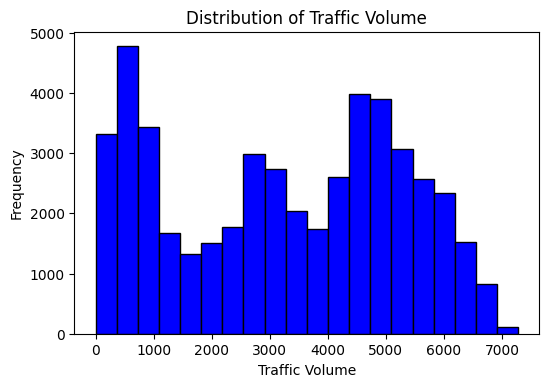

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Plotting a histogram for the traffic_volume column
plt.hist(traffic_data['traffic_volume'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

# Using Series.describe() for statistics about the traffic_volume column
traffic_volume_statistics = traffic_data['traffic_volume'].describe()
traffic_volume_statistics

Based on the histogram and descriptive statistics, the traffic_volume data shows a bimodal distribution with a wide range of values from 0 to 7,280. The average traffic volume is around 3,260 vehicles, but the spread is considerable, as evidenced by the standard deviation. This suggests that traffic volume can vary greatly, likely influenced by factors like time of day, day of the week, weather conditions, and holidays. 

## Traffic Volume: Day vs. Night

We'll divide the dataset into daytime data and nighttime data analyze how the time of day influences traffic.

In [12]:
# Transforming the 'date_time' column to datetime
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])

# Extracting the hour from the 'date_time' column
traffic_data['hour'] = traffic_data['date_time'].dt.hour

# Defining daytime as 7 AM to 7 PM (7-19) and nighttime as 7 PM to 7 AM (19-7)
daytime_data = traffic_data[(traffic_data['hour'] >= 7) & (traffic_data['hour'] < 19)]
nighttime_data = traffic_data[(traffic_data['hour'] >= 19) | (traffic_data['hour'] < 7)]

# Checking the first few rows of each to confirm
daytime_data_head = daytime_data.head()
nighttime_data_head = nighttime_data.head()

daytime_data_head

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


In [13]:
nighttime_data_head

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,19
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,20
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,21
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,22
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,23


Now we'll plot histograms for traffic volume on these datasets individually.

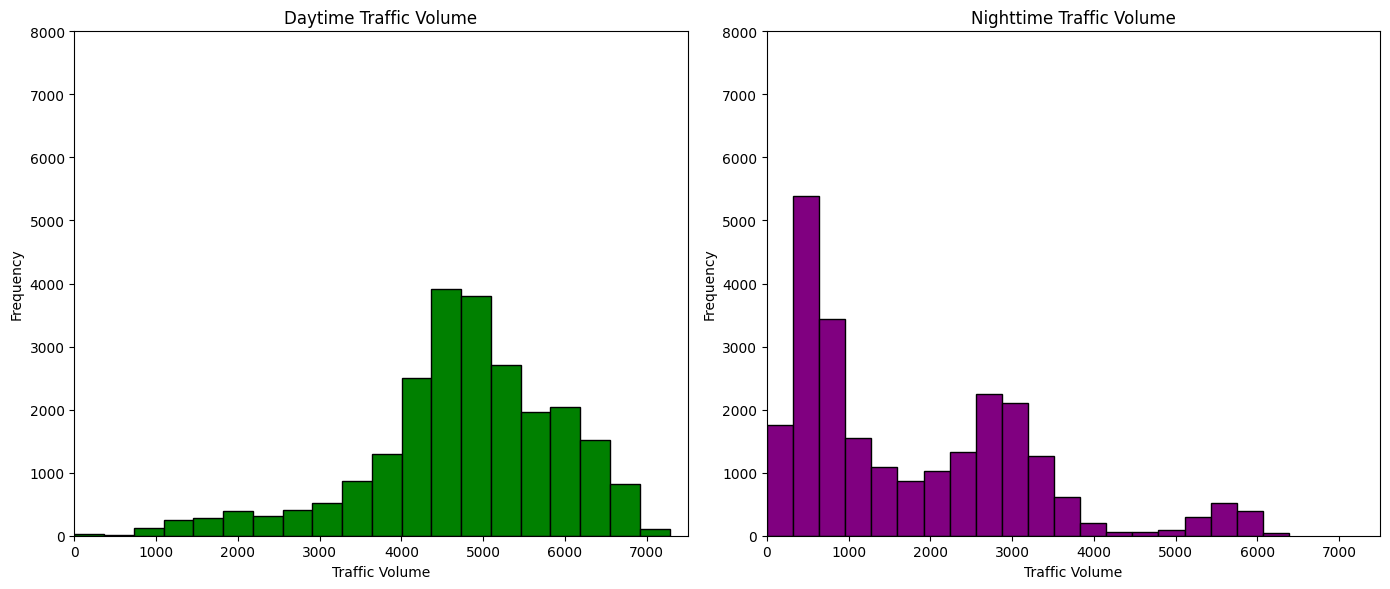

(count    23877.000000
 mean      4762.047452
 std       1174.546482
 min          0.000000
 25%       4252.000000
 50%       4820.000000
 75%       5559.000000
 max       7280.000000
 Name: traffic_volume, dtype: float64,
 count    24327.000000
 mean      1785.377441
 std       1441.951197
 min          0.000000
 25%        530.000000
 50%       1287.000000
 75%       2819.000000
 max       6386.000000
 Name: traffic_volume, dtype: float64)

In [14]:
# Setting up the matplotlib figure with two subplots
plt.figure(figsize=(14, 6))

# Plotting histogram for daytime data
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
plt.hist(daytime_data['traffic_volume'], bins=20, color='green', edgecolor='black')
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0, 7500]) # Setting the same x-axis limits for comparison
plt.ylim([0, 8000]) # Setting the same y-axis limits for comparison

# Plotting histogram for nighttime data
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
plt.hist(nighttime_data['traffic_volume'], bins=20, color='purple', edgecolor='black')
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0, 7500]) # Setting the same x-axis limits for comparison
plt.ylim([0, 8000]) # Setting the same y-axis limits for comparison

# Displaying the histograms
plt.tight_layout()
plt.show()

# Using Series.describe() for statistics about the traffic_volume column in both datasets
daytime_traffic_statistics = daytime_data['traffic_volume'].describe()
nighttime_traffic_statistics = nighttime_data['traffic_volume'].describe()

daytime_traffic_statistics, nighttime_traffic_statistics

Daytime Traffic Volume (Left Histogram):
The distribution is more uniform and spread out.
There are significant frequencies across a wider range of traffic volumes.
Peaks are observed at higher traffic volumes, indicating higher traffic during the day.

Nighttime Traffic Volume (Right Histogram):
The distribution is skewed towards lower traffic volumes.
Most of the traffic volumes at night are on the lower side, with a significant drop in frequency as the volume increases.
There is a noticeable peak at the lower end, indicating that low traffic volumes are more common at night.

## Time Indicators

Now that we've determined that traffic at night is generally light, we will only focus on daytime data to find indictators of heavy traffic.

One possible indicator is time. There might me more people on the road in a given month, day or time of day.

In [20]:
monthly_avg_traffic = daytime_data.groupby(daytime_data['date_time'].dt.month)['traffic_volume'].mean()
monthly_avg_traffic

date_time
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

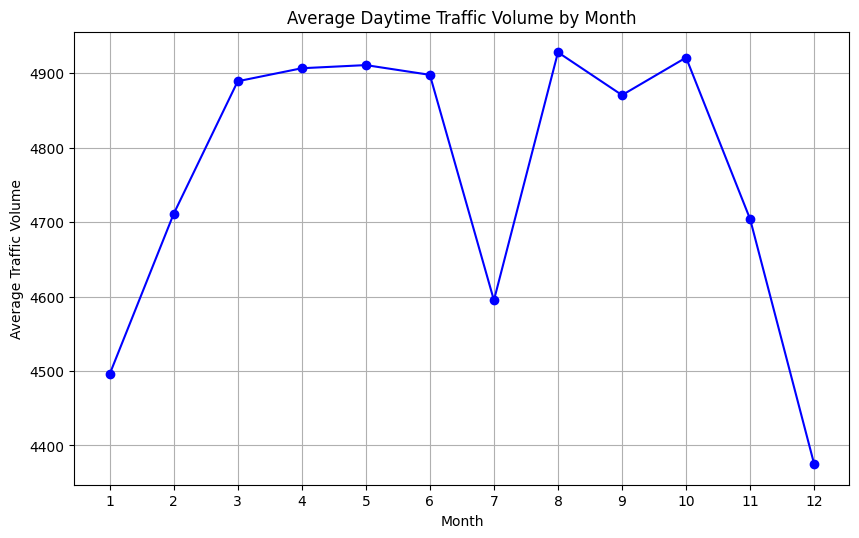

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_traffic.index, monthly_avg_traffic.values, marker='o', linestyle='-', color='blue')
plt.title('Average Daytime Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(1, 13))  # Setting x-ticks for each month
plt.grid(True)
plt.show()

The line plot shows that the daytime traffic is consistent throughout the year with the exception of the winter months where the traffic starts to decline before rising near the beginning of spring. 

One interesting exception is where there is a significant decrease in traffic in July.

Now we'll generate a plot for weekly traffic.

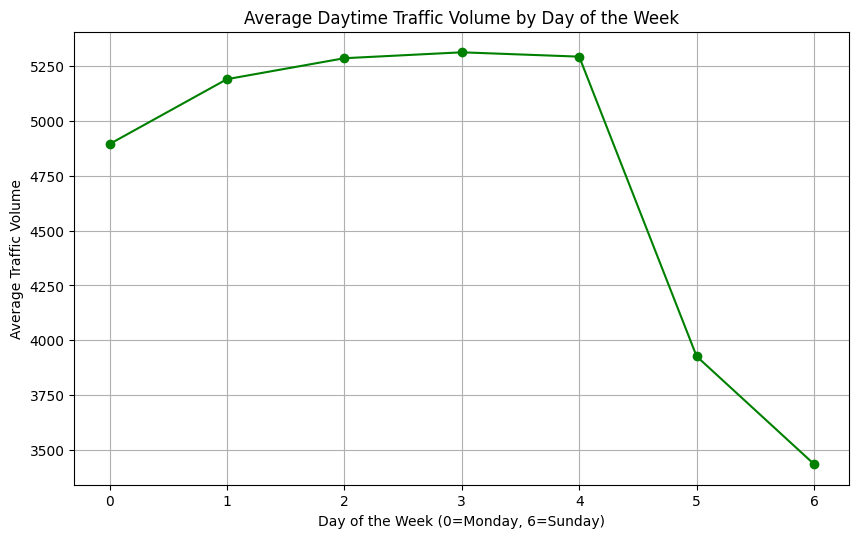

In [24]:
weekly_avg_traffic = daytime_data.groupby(daytime_data['date_time'].dt.dayofweek)['traffic_volume'].mean()

plt.figure(figsize=(10, 6))
plt.plot(weekly_avg_traffic.index, weekly_avg_traffic.values, marker='o', linestyle='-', color='green')
plt.title('Average Daytime Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(0, 7))  # Setting x-ticks for each day of the week
plt.grid(True)
plt.show()

The traffic during the week shows that the traffic is consistently the highest during business days and is significantly lower on the weekend.

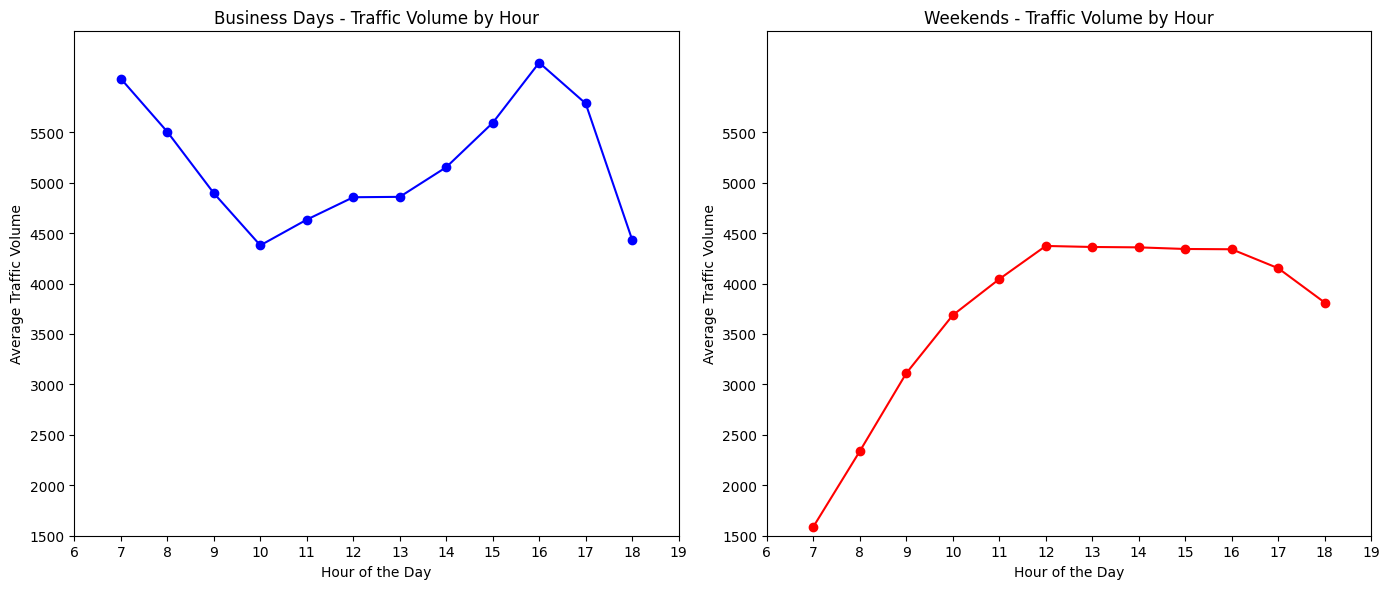

In [32]:
business_days = daytime_data[daytime_data['date_time'].dt.dayofweek <= 4]
weekends = daytime_data[daytime_data['date_time'].dt.dayofweek >= 5]

business_days_traffic_by_hour = business_days.groupby(business_days['date_time'].dt.hour)['traffic_volume'].mean()
weekends_traffic_by_hour = weekends.groupby(weekends['date_time'].dt.hour)['traffic_volume'].mean()

# Creating line plots for both business days and weekends on the same x and y axis range
plt.figure(figsize=(14, 6))

# Plot for business days
plt.subplot(1, 2, 1)
plt.plot(business_days_traffic_by_hour.index, business_days_traffic_by_hour.values, marker='o', color='blue')
plt.title('Business Days - Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(6, 20))
plt.yticks(range(0, 6000, 500))
plt.ylim(1500, 6500)

# Plot for weekends
plt.subplot(1, 2, 2)
plt.plot(weekends_traffic_by_hour.index, weekends_traffic_by_hour.values, marker='o', color='red')
plt.title('Weekends - Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(6, 20))
plt.yticks(range(0, 6000, 500))
plt.ylim(1500, 6500)

plt.tight_layout()
plt.show()

The graphs show that traffic during business days is consistently higher throughout the day than on weekends. The rush hours on business days are at 7am and 4pm.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

Another possible indicator of heavy traffic is the weather. 

In [38]:
daytime_data.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13.

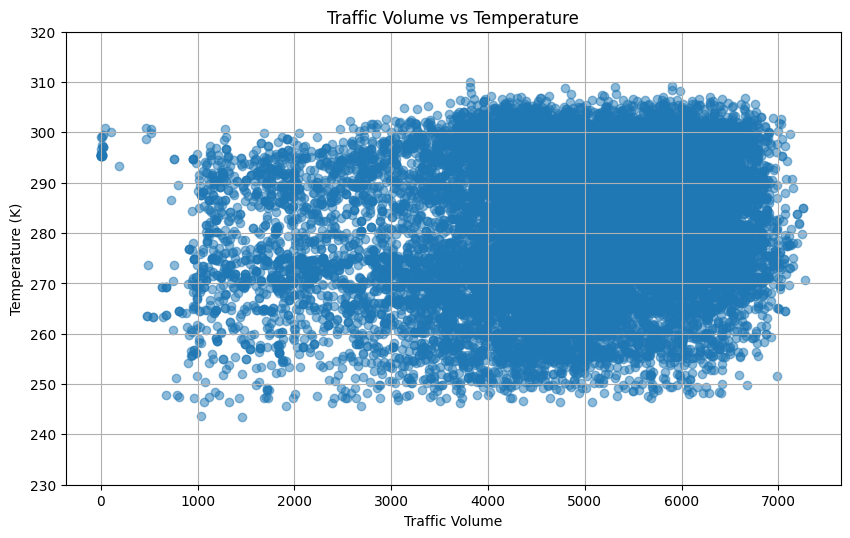

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(daytime_data['traffic_volume'], daytime_data['temp'], alpha=0.5)
plt.title('Traffic Volume vs Temperature')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature (K)')
plt.ylim(230, 320)
plt.grid(True)
plt.show()

Temperature dosn't look like a reliable indicator of heavy traffic.

## Weather Types

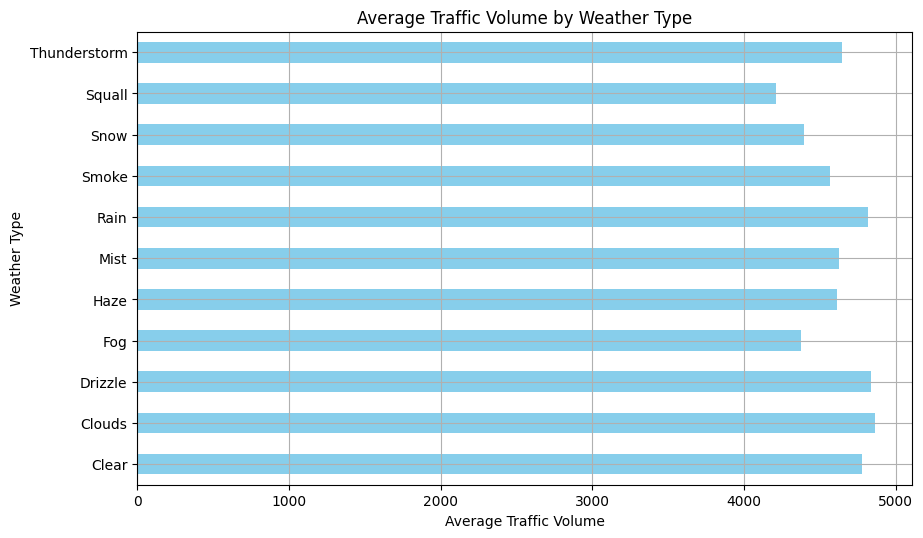

In [43]:
# First, we need to group the data by 'weather_main' and 'weather_description' and calculate the mean traffic volume
by_weather_main = daytime_data.groupby('weather_main')['traffic_volume'].mean()
by_weather_description = daytime_data.groupby('weather_description')['traffic_volume'].mean()

# Plotting a horizontal bar plot for the traffic_volume column of by_weather_main
plt.figure(figsize=(10, 6))
by_weather_main.plot.barh(color='skyblue')
plt.title('Average Traffic Volume by Weather Type')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Type')
plt.grid(True)
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's look at the weather description column.

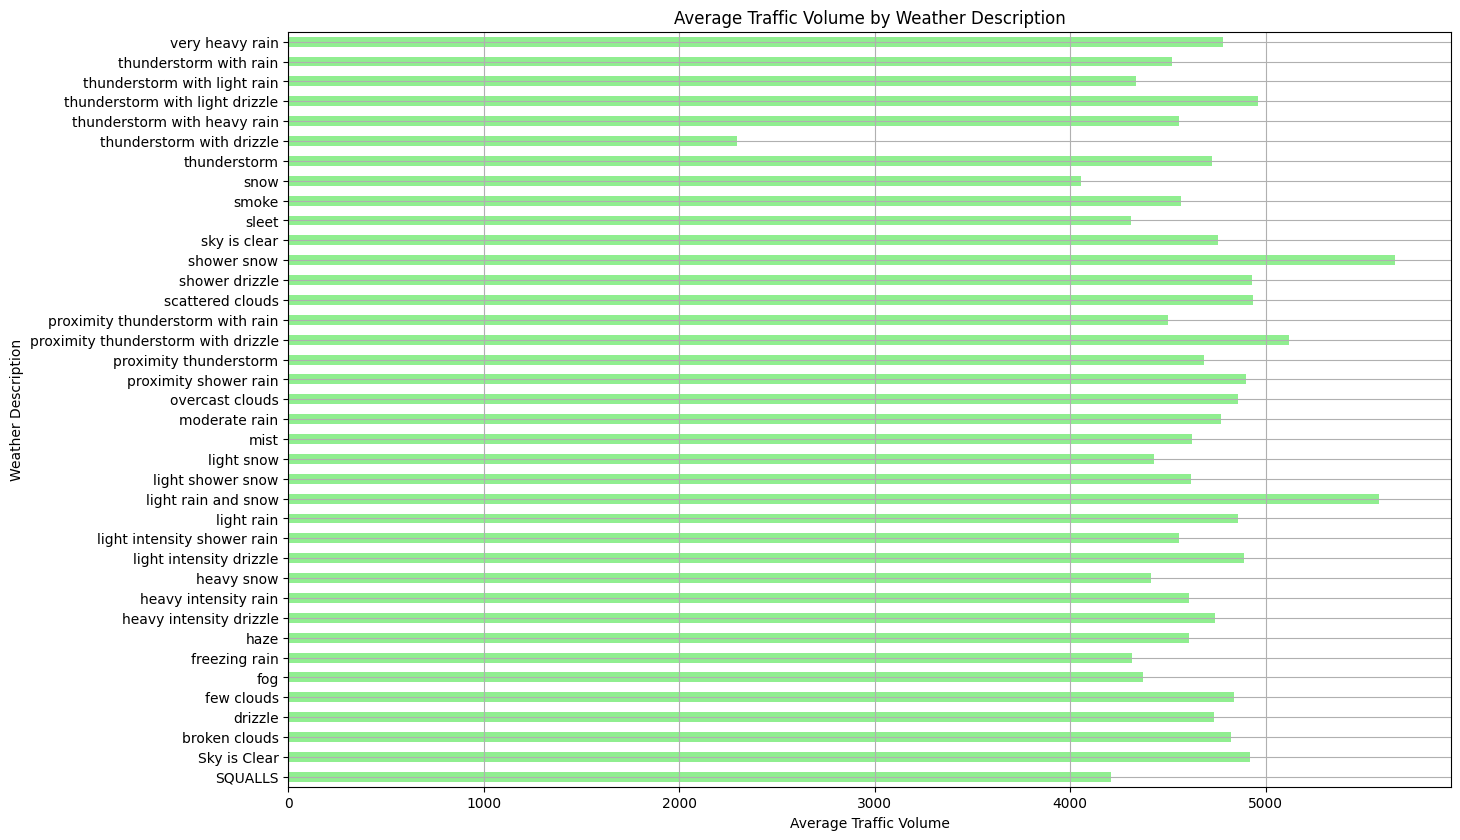

In [42]:
# Plotting a horizontal bar plot for the traffic_volume column of by_weather_description
plt.figure(figsize=(15, 10))  # Enlarging figure size for readability
by_weather_description.plot.barh(color='lightgreen')
plt.title('Average Traffic Volume by Weather Description')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Description')
plt.grid(True)
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values. Maybe more people take their cars when the weather is bad instead of riding a bike or walking.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

    
- Time indicators
    -The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    -The traffic is usually heavier on business days compared to the weekends.
    -On business days, the rush hours are around 7 and 16.
Weather indicators
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle